In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sdss_tools import sdss_jpg, sdss_fits, sdss_spectra, sdss_template

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astroquery.sdss import SDSS


%matplotlib inline

/home/simon/.local/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


##Introduccion

En este tallere aprenderemos a descargar catalogos, imagenes y espectros del Sloan Digital Sky Survey (SDSS). El SDSS es un survey astronómico que cubre gran parte del cielo y que ha producido una gran cantidad de datos de las estrellas y galaxias que habitan en el Universo.

Más info en el link http://www.sdss.org/surveys/
Video del SDSS en https://www.youtube.com/watch?v=UD6cOMpJlZU

El SDSS survey ha permitido que cualquier persona interesada en la Astronomia pueda visitar el sitio web y explorar las imagenes y catalogos del survey. Un ejemplo muy exitoso del uso de los datos del SDSS es el sitio web llamado Galaxy Zoo (https://www.galaxyzoo.org/?lang=es), el cual invitó a la gente de todo el mundo a revisar las galaxias detectadas por el SDSS y clasificarlas morfologicamente

##Parte 1: Conectarse con el servidor y descagar tabla con información de las galaxias del SDSS

Partiremos descargando un catalogo de galaxias elipticas de Galaxy Zoo y analizando los datos. Ejecute el siguiente codigo para descargar los datos

In [2]:
# Ejecute
cat_url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/SDSS_galaxyzoo_elipticas.csv'
cat_galaxyzoo=pd.read_csv(cat_url,header=0,sep=',')
cat_galaxyzoo.head()

,ID,ra,dec,votos
0,587736584965390473,217.002375,37.400917,36
1,588015508213727352,41.307375,-0.746111,32
2,587734949668257807,158.403875,11.702222,30
3,587738948284514416,156.077625,37.087222,17
4,587729653425897913,254.959417,33.830361,24


**Ejercicio**

El catalogo de galaxy zoo contiene el ID y las coordenadas de las galaxias clasificadas como elipticas. Además, contiene el número de personas que votaron y clasificaron estas galaxias como elipticas. Haga un histograma que muestre la distribucion del numero de votos y use al menos 10 bines.

¿En torno a que valor se concentra el numero de votaciones?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f536da28910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f536d95d950>]], dtype=object)

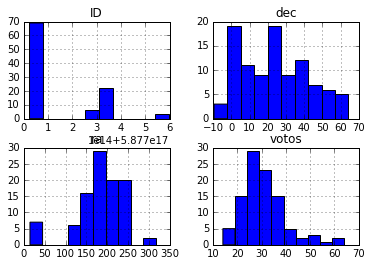

In [3]:
# Su codigo y respuesta aqui
cat_galaxyzoo.hist()

Como pueden apreciar, la tabla de galaxy zoo solo contiene coordenadas y votos de las galaxias. ¿Qué sucede con la informacion fotométrica y espectroscópica de estas galaxias? Esta información no se encuentra en el catalogo y es por ello que debemos usar query_region.

Para hacer consultas, lo primero es definir en que coordenadas del cielo estamos buscando un objeto. Para ello se usa la funcion SkyCoord.

In [4]:
# Ejecute aqui
ra=180.
dec=0.
coo=SkyCoord(ra, dec, unit=(u.deg,u.deg))
print coo

<SkyCoord (ICRS): (ra, dec) in deg
    (180.0, 0.0)>


Para hacer una consulta si existe o no un objeto en esa posicion se usa la funcion query_region de astroquery
Ejecute el siguiente codigo

In [5]:
# Ejecute aqui
result = SDSS.query_region(coo, spectro=True, photoobj_fields=['ra','dec','u','g','r','i','z'], specobj_fields=['z'], radius=2*u.arcsec)
print result

None


**Pregunta**
¿Cual fue el resultado? ¿Encontramos alguna galaxia en esa posicion?

**Ejercicio**

Complete el siguiente codigo para consultar los datos del primer objeto de nuestra tabla de galaxyzoo. Recuerde que el primer objeto es siempre i=0. ¿Aparece algun valor en la tabla al hacer print result?

In [6]:
# Complete donde aparecen ...

coo=SkyCoord(cat_galaxyzoo['ra'][0], cat_galaxyzoo['dec'][0], unit=(u.deg,u.deg))

result = SDSS.query_region(coo, spectro=True, photoobj_fields=['ra','dec','u','g','r','i','z'], specobj_fields=['z'], radius=2*u.arcsec)
print result

      ra          dec         u        g        r       i       z         z1    
------------- ------------ -------- -------- -------- ------ -------- ----------
217.002389618 37.400913452 17.58736 15.60366 14.69556 14.289 13.96379 0.08000372


** Ejercicio **

Ahora haremos la consulta de todos los objetos que estan en nuestro catalogo cat_galaxyzoo. Complete el siguiente codigo. ¿Aparecen los resultados para todas las galaxias? 

In [7]:
# Complete donde aparecen ...
coo=SkyCoord(cat_galaxyzoo['ra'], cat_galaxyzoo['dec'], unit=(u.deg,u.deg))

#Aqui iremos enviando al servidor la coordenada de la galaxia una por una
for i in range(len(coo)):
    print 'Processing galaxy ', i+1
    result = SDSS.query_region(coo[i], spectro=True, photoobj_fields=['ra','dec','u','g','r','i','z'], specobj_fields=['z'], radius=2*u.arcsec)
    if i==0:
        sdss_data=result
    else:
        sdss_data.add_row(np.array(result)[0])

print sdss_data

Processing galaxy  1
Processing galaxy  2
Processing galaxy  3
Processing galaxy  4
Processing galaxy  5
Processing galaxy  6
Processing galaxy  7
Processing galaxy  8
Processing galaxy  9
Processing galaxy  10
Processing galaxy  11
Processing galaxy  12
Processing galaxy  13
Processing galaxy  14
Processing galaxy  15
Processing galaxy  16
Processing galaxy  17
Processing galaxy  18
Processing galaxy  19
Processing galaxy  20
Processing galaxy  21
Processing galaxy  22
Processing galaxy  23
Processing galaxy  24
Processing galaxy  25
Processing galaxy  26
Processing galaxy  27
Processing galaxy  28
Processing galaxy  29
Processing galaxy  30
Processing galaxy  31
Processing galaxy  32
Processing galaxy  33
Processing galaxy  34
Processing galaxy  35
Processing galaxy  36
Processing galaxy  37
Processing galaxy  38
Processing galaxy  39
Processing galaxy  40
Processing galaxy  41
Processing galaxy  42
Processing galaxy  43
Processing galaxy  44
Processing galaxy  45
Processing galaxy  

Nuestro nuevo catalogo ya no se muestra de forma tan bonita y aparece como una matriz con muchos numeros. Para arreglarla, usamos la funcion DataFrame de pandas. Ejcute el sigiuiente codigo

In [8]:
# Ejecute aqui
cat_sdss_elipticas=pd.DataFrame(np.array(sdss_data))
cat_sdss_elipticas.head()

,ra,dec,u,g,r,i,z,z1
0,217.002390,37.400913,17.58736,15.60366,14.69556,14.28900,13.96379,0.080004
1,41.307385,-0.746131,17.76154,15.75966,14.81796,14.40375,14.02473,0.053942
2,158.403888,11.702202,18.09399,16.24945,15.43164,15.04739,14.78136,0.032844
3,156.077625,37.087213,19.08807,17.07669,16.07527,15.64609,15.29820,0.107093
4,254.959432,33.830356,20.29933,18.34799,17.17107,16.69359,16.35683,0.163118


##Parte 2: Conectarse con el servidor y descargar una imagen jpg de la galaxia

Ahor comenzaremos a descargar imagenes jpeg de nuestras galaxias de galaxy zoo. Para ello nos conectaremos al servidor de SDSS y usaremos la funcion sdss_jpg.

El siguiente codigo descargamos la imagen de las priemras dos galaxias

Procesando galaxia 1
Procesando galaxia 2


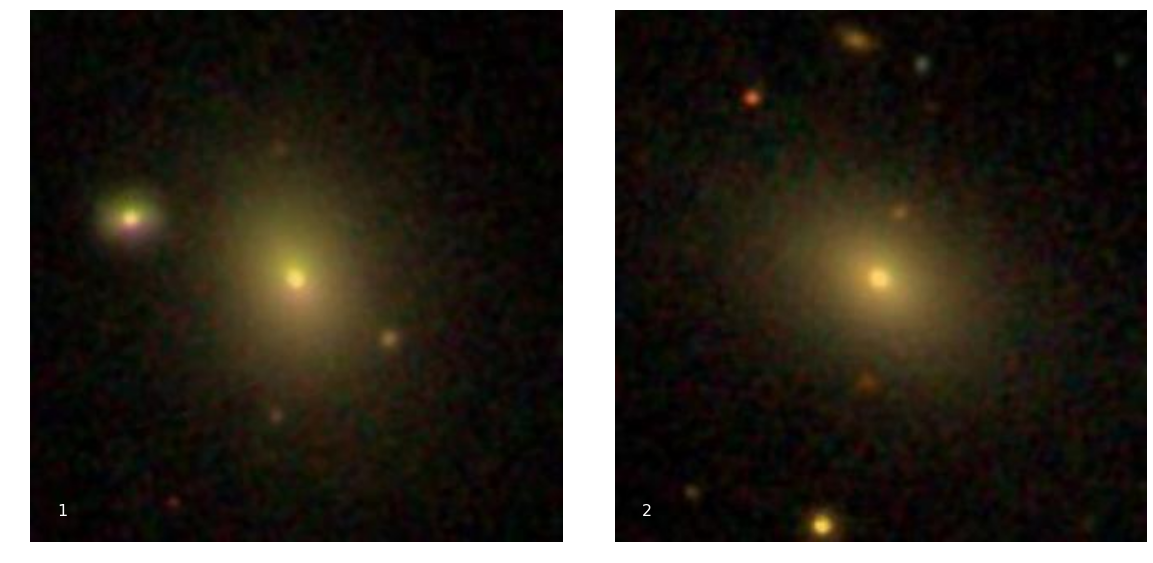

In [9]:
# Ejecute
sdss_jpg(coo[0:2])

**Ejercicio**

Descague las images jpeg para las primeras 10 imagenes de la lista. ¿Que tipo morfologico son las galaxias?

Procesando galaxia 1
Procesando galaxia 2
Procesando galaxia 3
Procesando galaxia 4
Procesando galaxia 5
Procesando galaxia 6
Procesando galaxia 7
Procesando galaxia 8
Procesando galaxia 9
Procesando galaxia 10


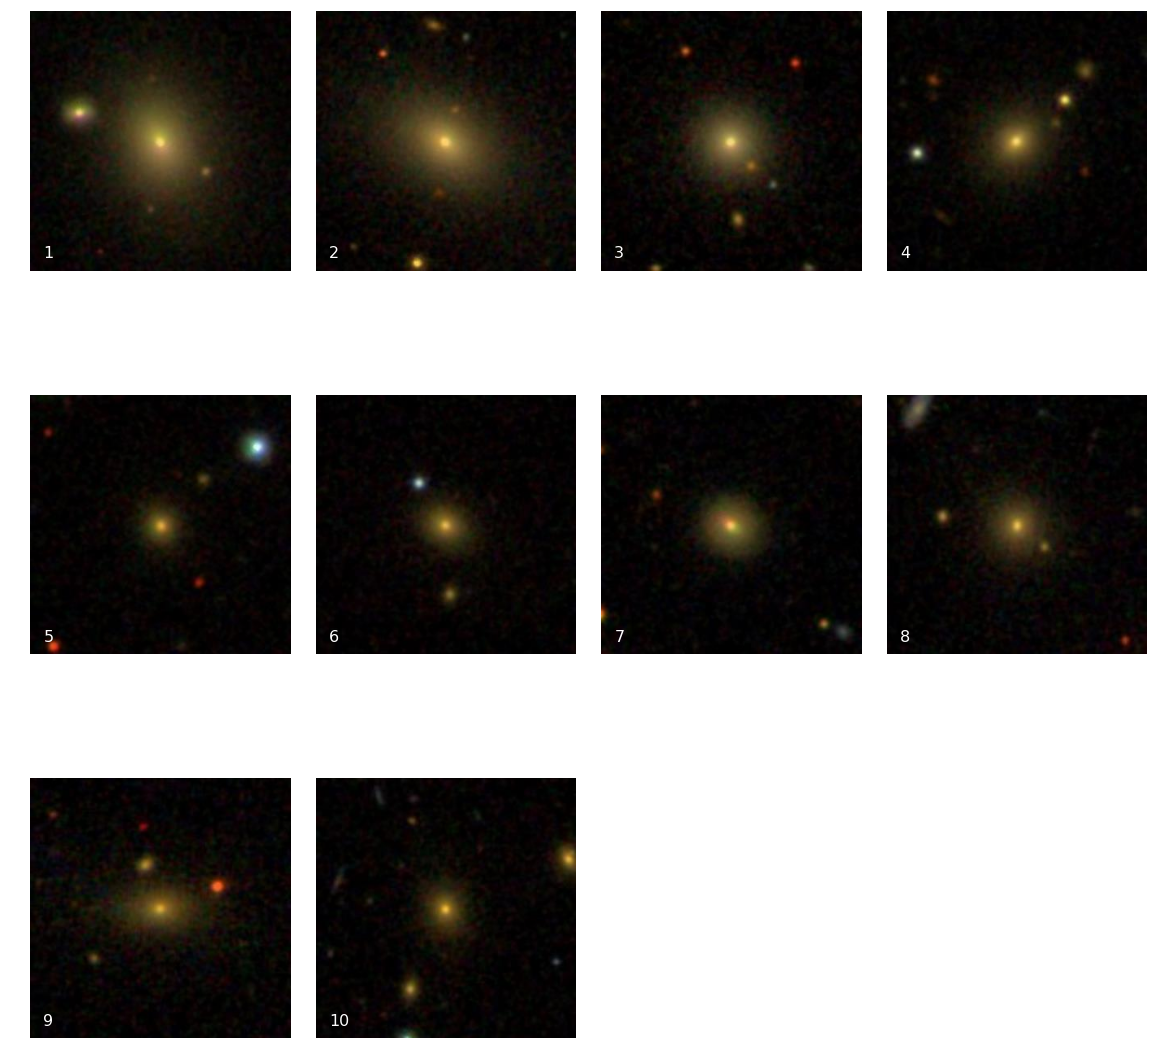

In [10]:
# Complete su codigo aqui
sdss_jpg(coo[:10])

##Parte 3: Conectarse con el servidor y descargar una imagen FITS de la galaxia

Los astronomos en la vida real no toman imagenes a colores y mas bien toman imagenes en blanco y negro. El tipo de archivo que usamos se llama fits.

Usaremos la funcion sdss_fits para descargar las imagenes de las primeras dos galaxias

Procesando galaxia 1


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


FITS image - min=-0.04  max=0.71
Procesando galaxia 2


KeyboardInterrupt: 

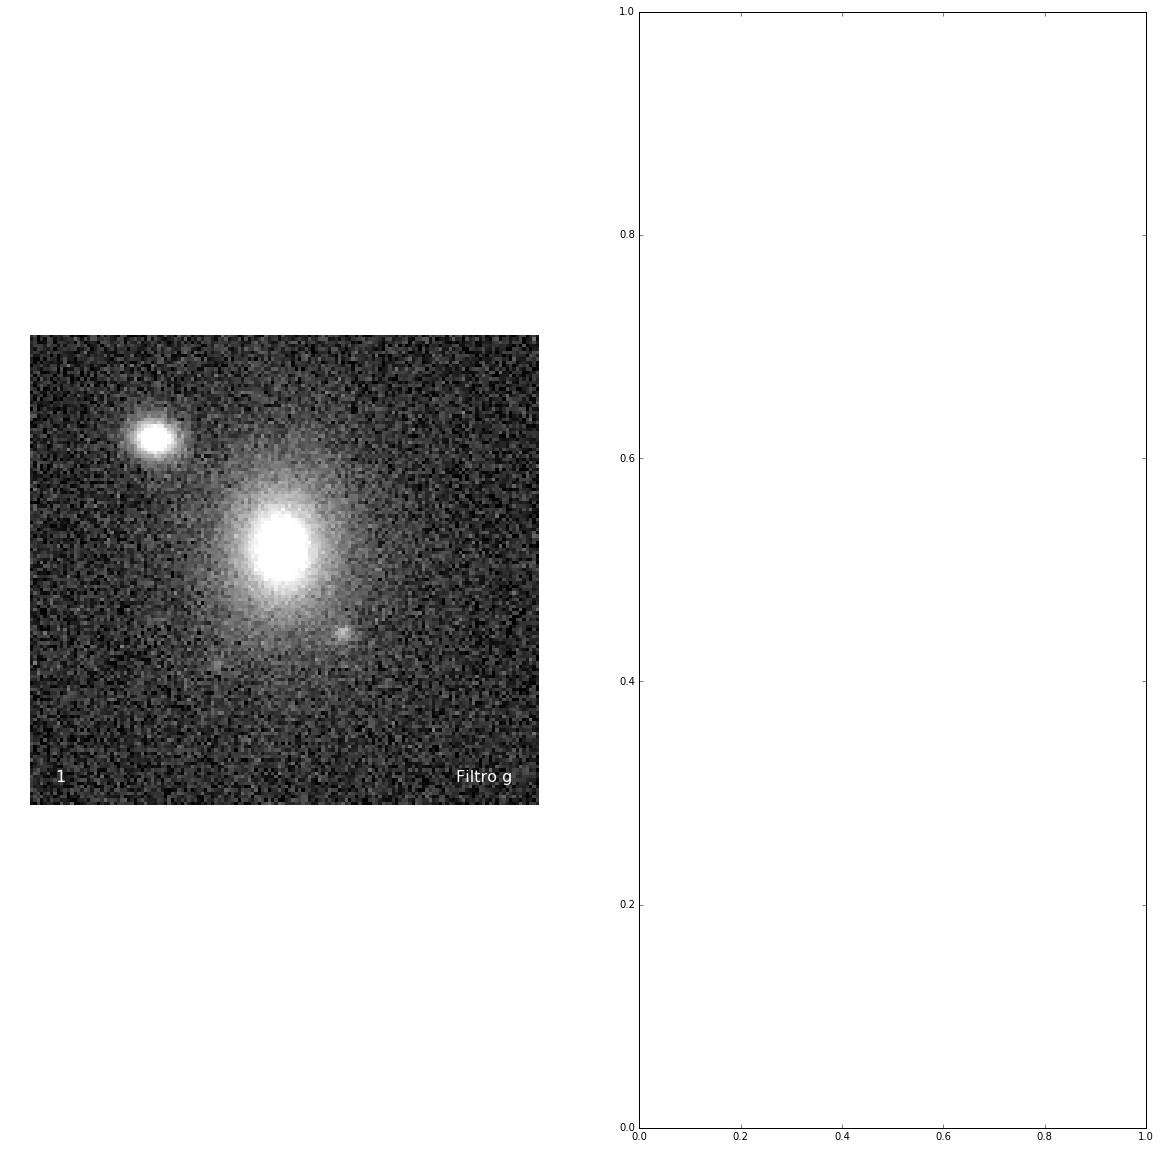

In [11]:
# Ejecute aqui.
# Primero descargamos las imagenes en el filtro g
sdss_fits(coo[0:2], filtro='g')

In [ ]:
# Ejecute aqui
# Ahora descargamos imagenes en el filtro r
sdss_fits(coo[0:2], filtro='r')

**Ejercicio**

Descague las images fits para las primeras 10 imagenes de la lista y use el filtro z. ¿Son iguales o distitnas las imagenes fits y jpeg?

In [ ]:
# Complete el codigo aqui
sdss_fits(...)

##Parte 4: Conectarse con el servidor y descargar el espectro de la galaxia

Ahora comenzaremos a descargar espectros de nuestras galaxias de galaxyzoo. El espectro es la firma que poseen las galaxias.

El siguiente codigo descargamos el espectro de una tipica galaxia eliptica

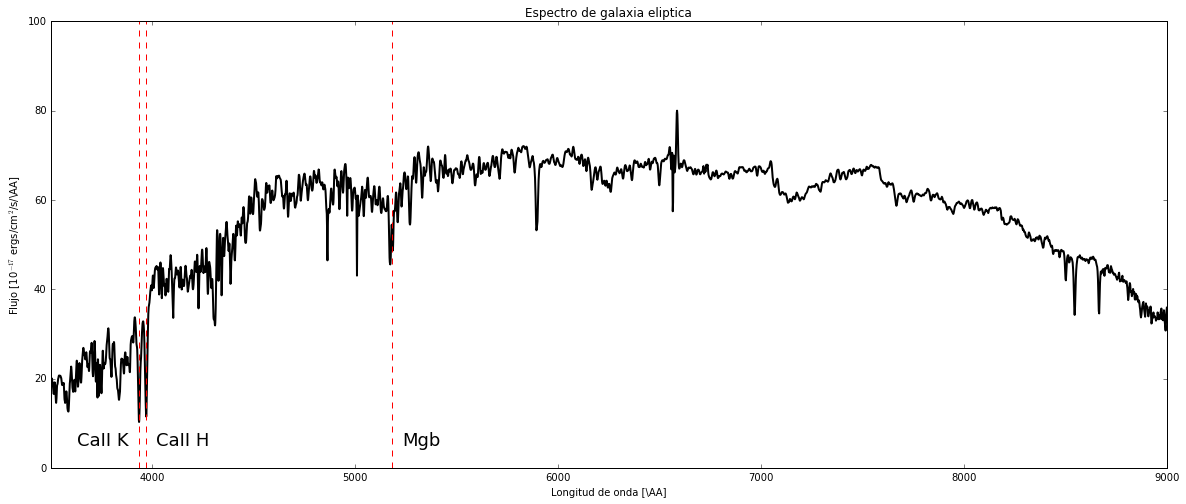

In [12]:
sdss_template(tipo='eliptica')

Ahora descargaremos el espectro de las primeras dos galaxias

Procesando galaxia 1
Procesando galaxia 2


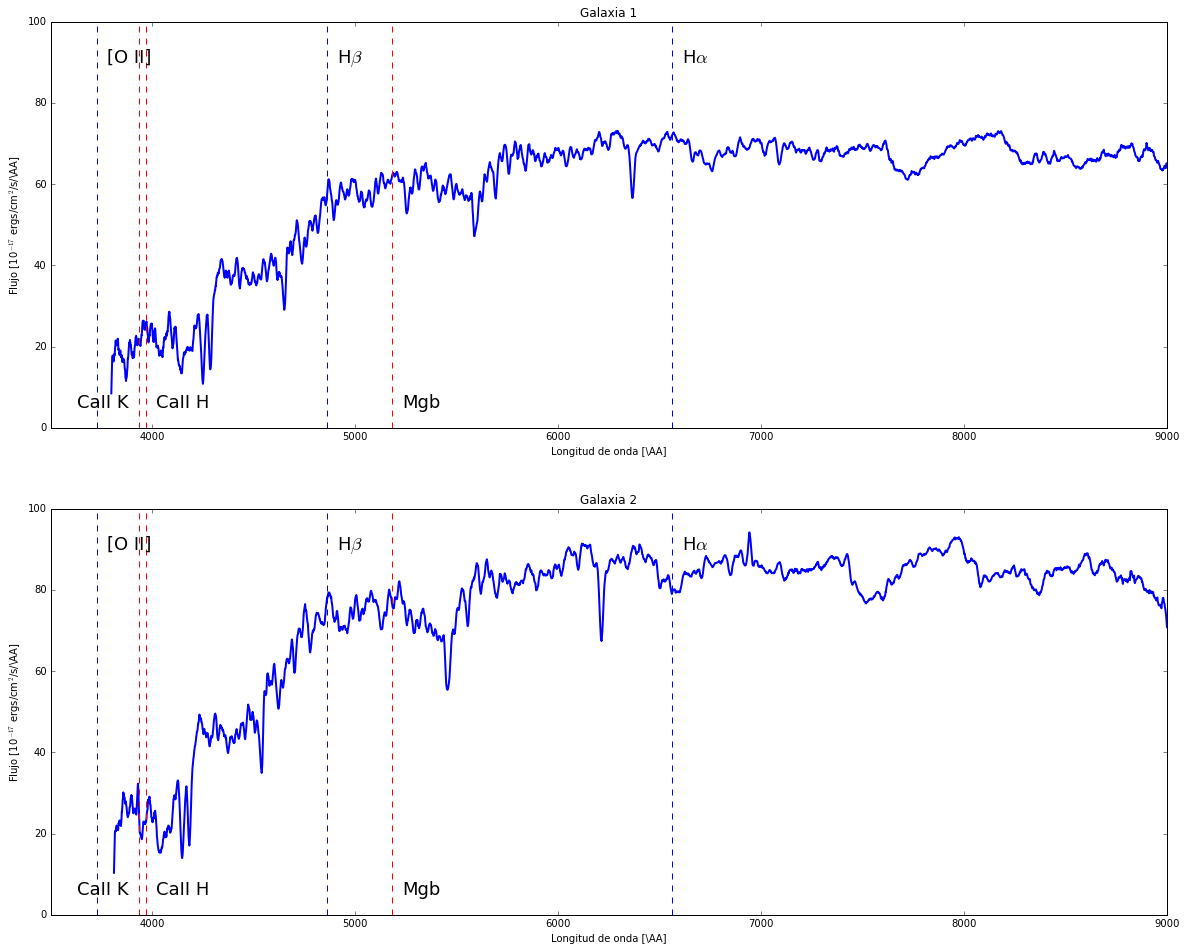

In [13]:
#Ejecute aqui
sdss_spectra(coo[0:2], redshift=[0.,0.])

**Ejercicio**

Comience a cambiar los valores de la variable redshift y trate que las lineas de absorción coincidan así como en la funcion sdss_template.

In [ ]:
#Complete aqui donde aparecen los ...
sdss_spectra(coo[0:2], redshift=[...,...])

**Ejercicio**

Ahora descagaremos los espectros para las priemras 10 galaxias. Complete el codigo y determine el redshift de cada una

In [ ]:
#Complete aqui donde aparecen los ...
sdss_spectra(..., redshift=[...])

##Parte 5


### Repita el mismo procedimiento anterior, pero esta vez usando las galaxias espirales

In [ ]:
cat_url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/SDSS_galaxyzoo_espirales.csv'
cat_galaxyzoo=pd.read_csv(cat_url,header=0,sep=',')
cat_galaxyzoo.head()

In [ ]:
coo=SkyCoord(cat_galaxyzoo['ra'], cat_galaxyzoo['dec'], unit=(u.deg,u.deg))
for i in range(len(coo)):
    print 'Processing galaxy ', i
    result = SDSS.query_region(coo[i], spectro=True, photoobj_fields=['ra','dec','u','g','r','i','z'], radius=2*u.arcsec)
    if i==0:
        sdss_data=result
    else:
        sdss_data.add_row(np.array(result)[0])

cat_sdss_espirales=pd.DataFrame(np.array(sdss_data))
cat_sdss_espirales

In [ ]:
sdss_template(tipo='espiral')

## Apendices

Descargar el catalogo completo de Galaxy zoo

In [ ]:
import requests, zipfile, StringIO

In [ ]:
cat_url='http://galaxy-zoo-1.s3.amazonaws.com/GalaxyZoo1_DR_table2.csv.zip'

r = requests.get(cat_url)
z = zipfile.ZipFile(StringIO.StringIO(r.content))

cat_file='GalaxyZoo1_DR_table2.csv'
cat_data=pd.read_csv(z.open(cat_file))
cat_data.head()

In [ ]:
cat_data=cat_data.sort_values('P_EL_DEBIASED',ascending=0)
cat_elliptical=cat_data[cat_data['ELLIPTICAL']==1][0:100]
cat_elliptical['ra']=Angle(cat_elliptical['RA'], unit=u.hourangle).degree
cat_elliptical['dec']=Angle(cat_elliptical['DEC'], unit=u.degree).degree
cat_elliptical=cat_elliptical.rename(columns = {'OBJID':'ID','NVOTE':'votos'})
cat_elliptical=cat_elliptical[['ID','ra','dec','votos']].reset_index(drop=True)

cat_elliptical.to_csv('../data/SDSS_galaxyzoo_elipticas.csv',index=False)

In [ ]:
cat_data=cat_data.sort_values('P_CS_DEBIASED',ascending=0)
cat_spiral=cat_data[cat_data['SPIRAL']==1][0:100]
cat_spiral['ra']=Angle(cat_spiral['RA'], unit=u.hourangle).degree
cat_spiral['dec']=Angle(cat_spiral['DEC'], unit=u.degree).degree
cat_spiral=cat_spiral.rename(columns = {'OBJID':'ID','NVOTE':'votos'})
cat_spiral=cat_spiral[['ID','ra','dec','votos']].reset_index(drop=True)

cat_spiral.to_csv('../data/SDSS_galaxyzoo_espirales.csv',index=False)